In [1]:
import pandas as pd
path = "/Users/emrecavus/Desktop/DSA 210 Project/DSA 210 Data.csv"
data = pd.read_csv(path, delimiter=',')

In [2]:
data.head()

,Date,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours
0,09.03.2025,5,5.5,4.5,1.0
1,10.03.2025,4,6.5,5.5,1.0
2,11.03.2025,4,6.5,4.5,2.0
3,12.03.2025,4,6.0,5.0,1.0
4,13.03.2025,3,7.0,5.0,2.0


# I've successfully loaded the data that I've collected, and I will now start my Exploratory Data Analysis
<h3> First, I will dobule check the structure of my data, then calculate the basic statistics </h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             64 non-null     object 
 1   Caffeine Intake  64 non-null     int64  
 2   Hours of Sleep   64 non-null     float64
 3   Study Hours      64 non-null     float64
 4   Exercise Hours   64 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.6+ KB


In [4]:
data.describe()

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours
count,64.000000,64.000000,64.000000,64.000000
mean,3.781250,6.843750,4.835938,1.710938
std,1.015261,1.302851,1.175324,0.478130
min,2.000000,4.500000,1.500000,0.000000
25%,3.000000,5.875000,4.000000,1.500000
50%,4.000000,7.000000,5.000000,2.000000
75%,4.000000,7.500000,5.500000,2.000000
max,6.000000,10.000000,7.500000,2.000000


# Next, I will visualize the distributions of the data using histograms, then I will plot a correlation heatmap

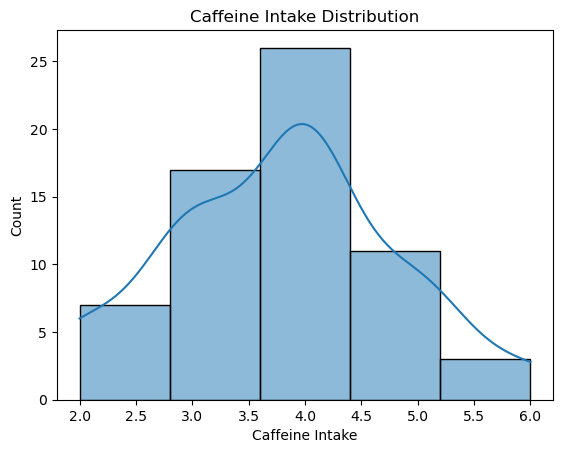

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Caffeine Intake'], bins=5, kde=True)
plt.title("Caffeine Intake Distribution")
plt.show()

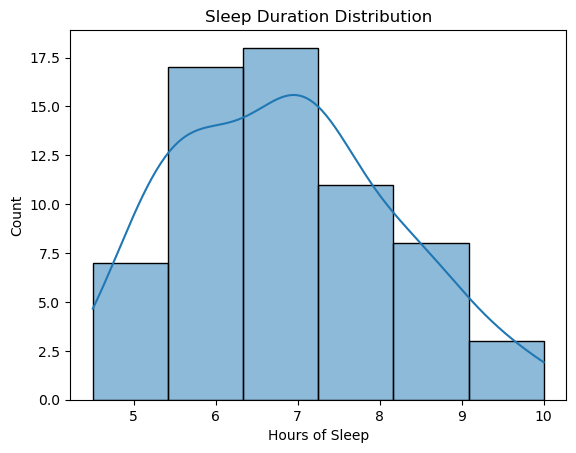

In [6]:
sns.histplot(data['Hours of Sleep'], bins=6, kde=True)
plt.title("Sleep Duration Distribution")
plt.show()

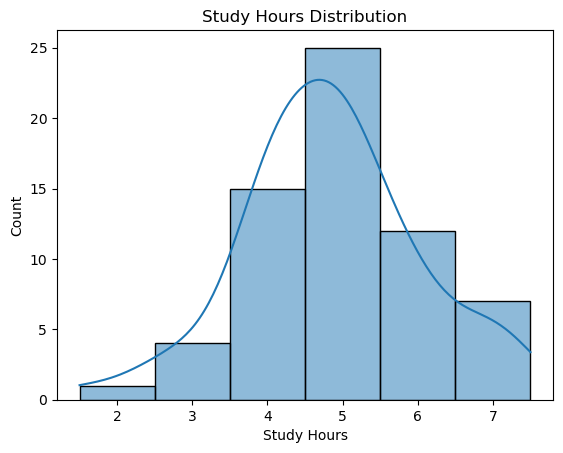

In [7]:
sns.histplot(data['Study Hours'], bins=6, kde=True)
plt.title("Study Hours Distribution")
plt.show()

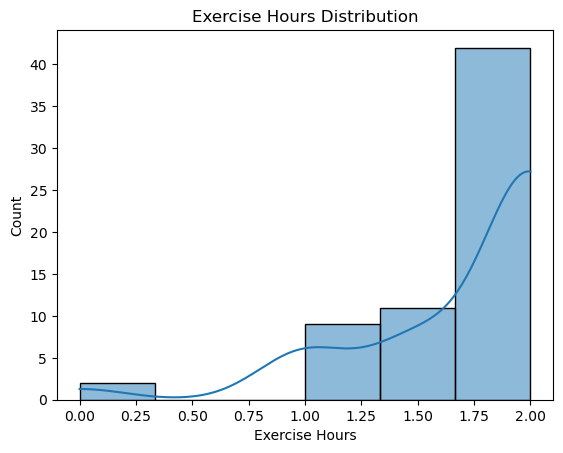

In [8]:
sns.histplot(data['Exercise Hours'], bins=6, kde=True)
plt.title("Exercise Hours Distribution")
plt.show()

## Now I will plot the boxplots of these variables to see whether there are significant outliers that can lead me to change my approach
<h3> I will also see the interquartile ranges and their endevors </h3>
<h3> Date cannot be converted into a float, so we need to drop it in order to plot the boxplots and the correlation heatmap </h3>

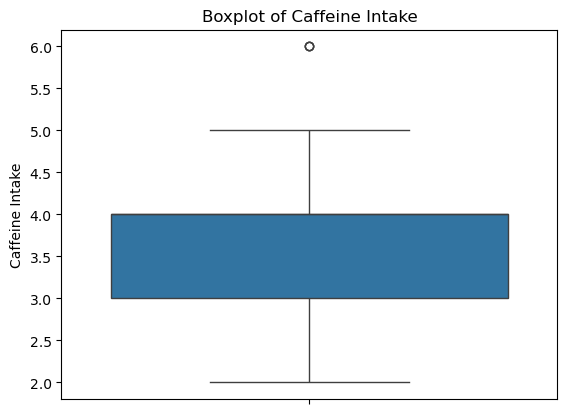

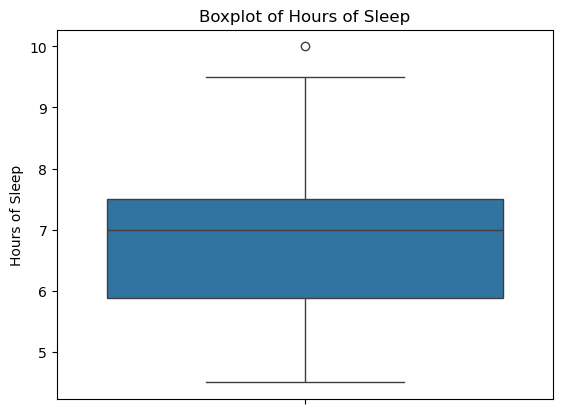

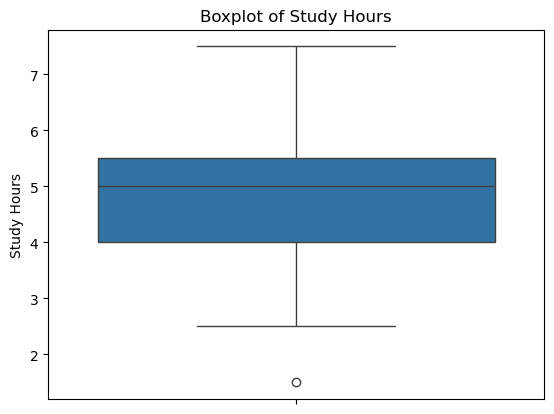

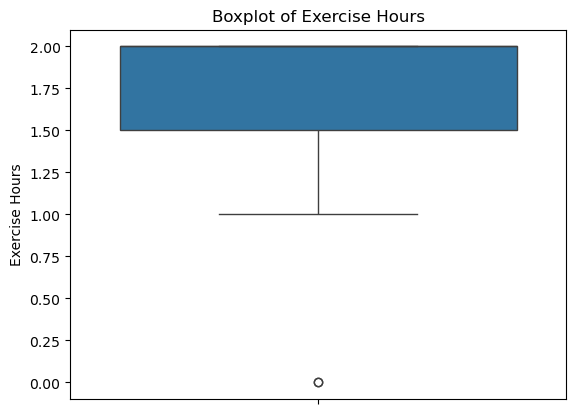

In [9]:
numeric_data = data.drop(columns=['Date'])
for col in numeric_data.columns:
    sns.boxplot(y=numeric_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

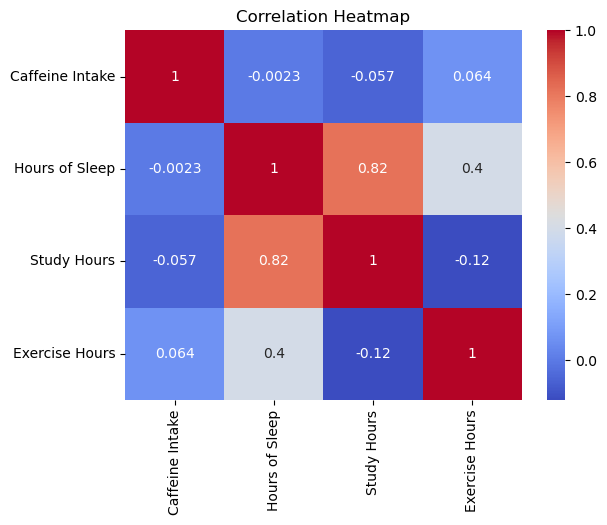

In [10]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Now I will do scatter plots for the relationships Caffeine Intake vs Study and Exercise Hours, and Hours of Sleep vs Study and Exercise Hours


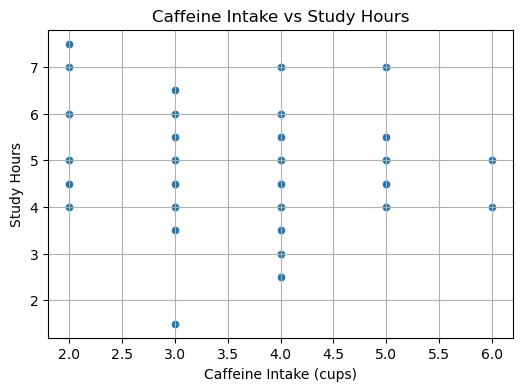

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Caffeine Intake', y='Study Hours')
plt.title("Caffeine Intake vs Study Hours")
plt.xlabel("Caffeine Intake (cups)")
plt.ylabel("Study Hours")
plt.grid(True)
plt.show()

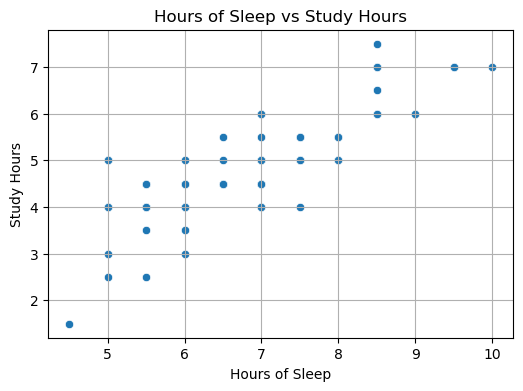

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Hours of Sleep', y='Study Hours')
plt.title("Hours of Sleep vs Study Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Study Hours")
plt.grid(True)
plt.show()

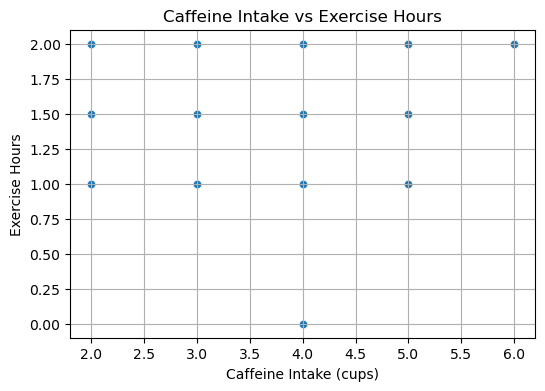

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Caffeine Intake', y='Exercise Hours')
plt.title("Caffeine Intake vs Exercise Hours")
plt.xlabel("Caffeine Intake (cups)")
plt.ylabel("Exercise Hours")
plt.grid(True)
plt.show()

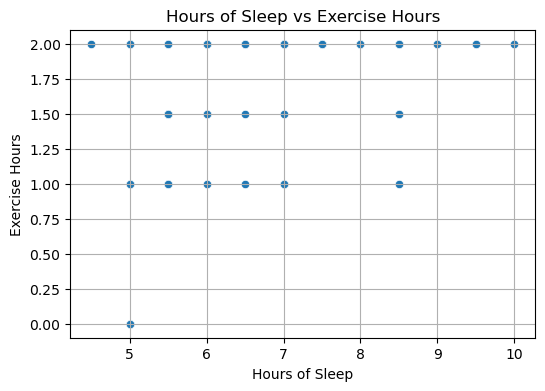

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Hours of Sleep', y='Exercise Hours')
plt.title("Hours of Sleep vs Exercise Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Exercise Hours")
plt.grid(True)
plt.show()

# As it can be seen from the scatterplots, there is a close to linear relationship between hours of sleep and study hours 
## On the other hand, there is a weak correlation between caffeine intake and both of the study and exercise hours, so we can't categorize the scatterplot as linear or quadratic

<h3> Next, I will use the regplot method of Seaborn library to find the best fit line between hours of sleep and productive hours </h3>

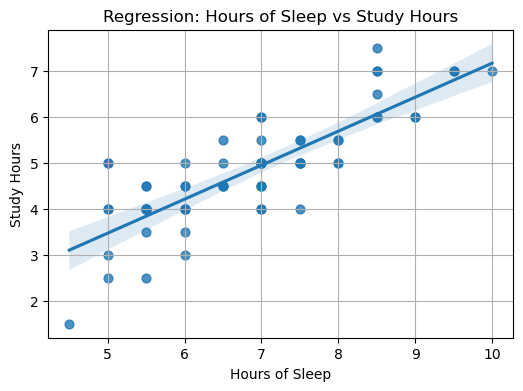

In [15]:
plt.figure(figsize=(6, 4))
sns.regplot(data=numeric_data, x='Hours of Sleep', y='Study Hours', ci=95, scatter_kws={"s": 40})
plt.title("Regression: Hours of Sleep vs Study Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Study Hours")
plt.grid(True)
plt.show()

# The shaded region represents a 95% confidence interval that belongs to the best fit line. #
<h2> As it can be seen from the regplot, a significant portion of the datapoints belong to that confidence interval </h2>
<h3> But, I will examine the quadratic and polynomial types of regressions to see if I can achieve better fits </h3>

In [16]:
import numpy as np
import statsmodels.api as sm
x = numeric_data['Hours of Sleep']
y = numeric_data['Study Hours']


X_quad = np.column_stack((x**2, x))
X_quad = sm.add_constant(X_quad)
model = sm.OLS(y, X_quad).fit()

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = np.column_stack((x_pred**2, x_pred))
X_pred = sm.add_constant(X_pred)
y_pred = model.predict(X_pred)

pred_summary = model.get_prediction(X_pred).summary_frame()
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']


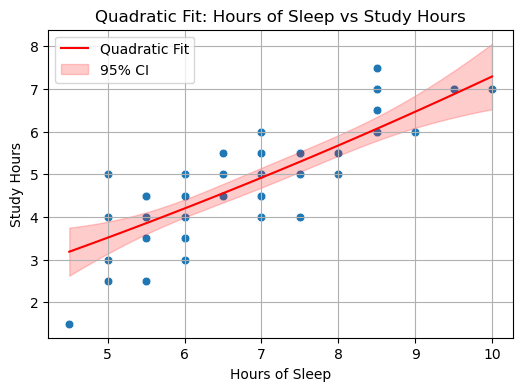

In [17]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=40)
plt.plot(x_pred, y_pred, color='red', label='Quadratic Fit')
plt.fill_between(x_pred, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')
plt.title("Quadratic Fit: Hours of Sleep vs Study Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Study Hours")
plt.legend()
plt.grid(True)
plt.show()

## Both linear and quadratic fits have relatively successful confidence intervals, but the quadratic model is better at explaining the variances and nouances in the data
<h3> Next I will examine the pairwise relationships of the variables </h3>

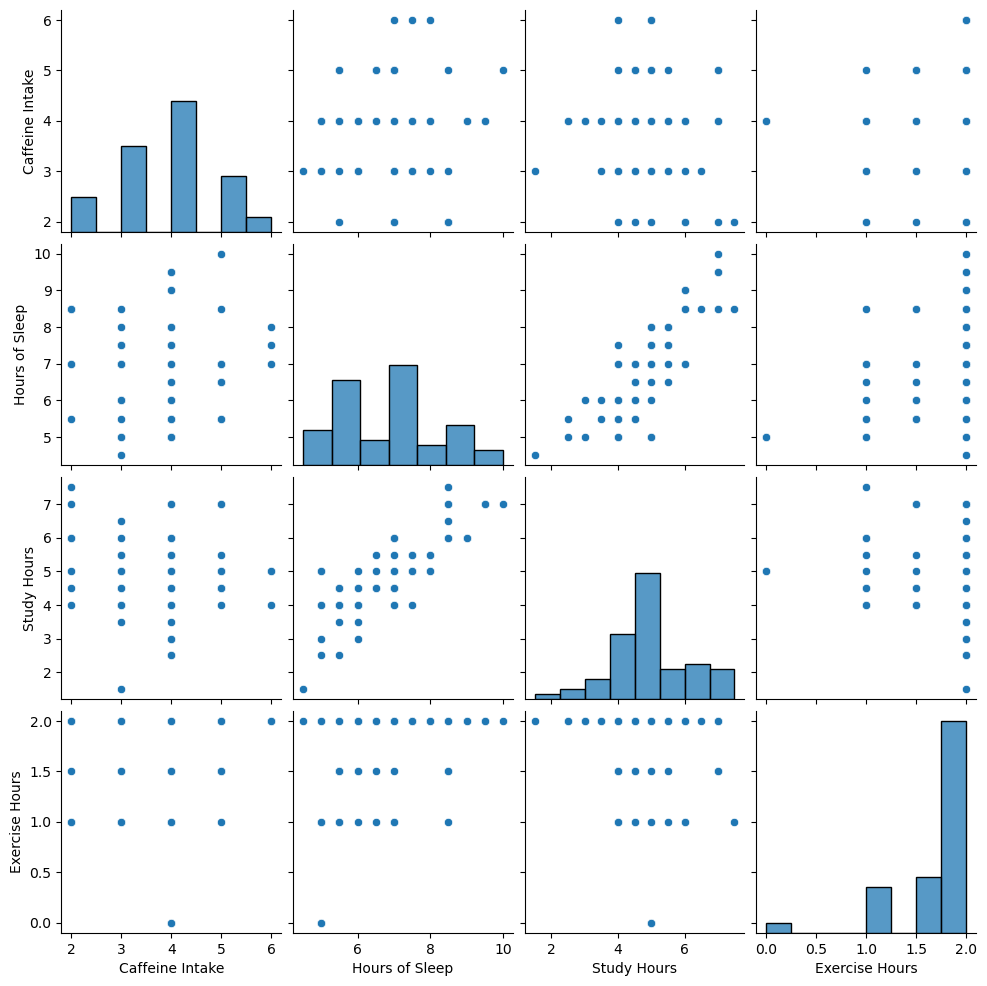

In [18]:
sns.pairplot(numeric_data)
plt.show()

# Hypothesis Testing
## I will divide the hours of sleep into two and see whether their corresponding productivities differ significantly or not
<h3> The mean of hours of sleep is 6.9, thus I will divide it into 2 making 6.5 the threshold for the seperation (lower than 6.5 being lower hours olf sleep and vice versa) </h3>

In [19]:
numeric_data['SleepLevel'] = pd.cut(numeric_data['Hours of Sleep'], bins=[0, 6.5, 10], labels=['Low', 'High'])

In [20]:
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,SleepLevel
0,5,5.5,4.5,1.0,Low
1,4,6.5,5.5,1.0,Low
2,4,6.5,4.5,2.0,Low
3,4,6.0,5.0,1.0,Low
4,3,7.0,5.0,2.0,High


In [21]:
group_low = numeric_data[numeric_data['SleepLevel'] == 'Low']['Study Hours']
group_high = numeric_data[numeric_data['SleepLevel'] == 'High']['Study Hours']
print(group_low.head())
print(group_high.head())

0     4.5
1     5.5
2     4.5
3     5.0
10    1.5
Name: Study Hours, dtype: float64
4    5.0
5    5.0
6    7.0
7    6.0
8    5.0
Name: Study Hours, dtype: float64


## H₀: μ₁ - μ₂ = 0 and Hₐ: μ₁ - μ₂ < 0
<h3> Where μ₁ represents the mean of the productive hours of the lower group and μ₂ represents the mean of the study hours of the higher group </h3>

## The t-statistic for two-sample t test is the following: 
$$
t = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

In [22]:
group_low.describe()

count    29.000000
mean      4.017241
std       0.870988
min       1.500000
25%       4.000000
50%       4.000000
75%       4.500000
max       5.500000
Name: Study Hours, dtype: float64

In [23]:
group_high.describe()

count    35.000000
mean      5.514286
std       0.943131
min       4.000000
25%       5.000000
50%       5.500000
75%       6.000000
max       7.500000
Name: Study Hours, dtype: float64

$$
\bar{X}_1 \; \text{is} \; 4.017 \quad \text{and} \quad \bar{X}_2 \; \text{is} \; 5.514
$$

$$
s_1^2 = 0.759 \quad \text{and} \quad s_2^2 = 0.889
$$

$$
n_1 = 29 \quad \text{and} \quad n_2 = 35
$$


# Based on these values the t-statistic under the assumption of null hypothesis is: 
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
= \frac{4.017 - 5.514}{\sqrt{\frac{0.759}{29} + \frac{0.889}{35}}}
= \frac{-1.497}{\sqrt{0.026 + 0.0254}}
= \frac{-1.497}{\sqrt{0.0514}}
= \frac{-1.497}{0.2267}
\approx -6.60
$$


### This is a one tailed t-test, so we have to find the value from the one-tailed t table
<h3> Degree of freedom is 29 + 35 - 2 = 62, and our significance level is 0.05 </h3>

In [24]:
from scipy.stats import t

df = len(group_low) + len(group_high) - 2
alpha = 0.05
t_critical = t.ppf(1 - alpha, df)

print(f"Critical t-value (one-tailed, α = 0.05): {t_critical:.4f}")

Critical t-value (one-tailed, α = 0.05): 1.6698


### Hypothesis Test Conclusion

We performed a one-tailed independent two-sample t-test comparing the mean productive hours between individuals with low and high sleeping hours.

- Calculated t-statistic: \( t = -6.60 \)
- Critical t-value at  alpha = 0.05, df = 62: critical value = 1.6698

Since:
\[
|t| = 6.60 > 1.6698 = critical value
\]

we **reject the null hypothesis** (H₀).

**Conclusion:**  
There is statistically significant evidence at the 0.05 level to suggest that individuals who sleep more than 6.5 hours tend to have higher productive hours compared to those who sleep less.

## The ideal routine requires 8 hours of sleep. Now I will create a new field called sleep deficit which will calculate how much sleep do I lack.
<h3> If the hours of sleep is less than 8, the sleep deficit is 0 </h3>

In [25]:
numeric_data['Sleep Deficit'] = np.maximum(0, 8 - numeric_data['Hours of Sleep'])
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,SleepLevel,Sleep Deficit
0,5,5.5,4.5,1.0,Low,2.5
1,4,6.5,5.5,1.0,Low,1.5
2,4,6.5,4.5,2.0,Low,1.5
3,4,6.0,5.0,1.0,Low,2.0
4,3,7.0,5.0,2.0,High,1.0


## Now I will examine the following: the claim is that the amount of caffeine consumed yesterday triggers the sleep deficit I will have today
### I will conduct hypothesis tests that determines whether caffeine consumption and sleep deficit are independent events or not

In [26]:
numeric_data['Caffeine_Yesterday'] = numeric_data['Caffeine Intake'].shift(1)

## The first data entry will be NaN, so I don't want that.

In [27]:
numeric_data = numeric_data.dropna(subset=['Caffeine_Yesterday'])

In [28]:
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,SleepLevel,Sleep Deficit,Caffeine_Yesterday
1,4,6.5,5.5,1.0,Low,1.5,5.0
2,4,6.5,4.5,2.0,Low,1.5,4.0
3,4,6.0,5.0,1.0,Low,2.0,4.0
4,3,7.0,5.0,2.0,High,1.0,4.0
5,4,7.5,5.0,2.0,High,0.5,3.0


## I will first apply correlation test to them, later on I will apply Chi-Square tests to see whether they are dependent or not

In [29]:
numeric_data[['Caffeine_Yesterday', 'Sleep Deficit']].corr()

,Caffeine_Yesterday,Sleep Deficit
Caffeine_Yesterday,1.000000,-0.065678
Sleep Deficit,-0.065678,1.000000


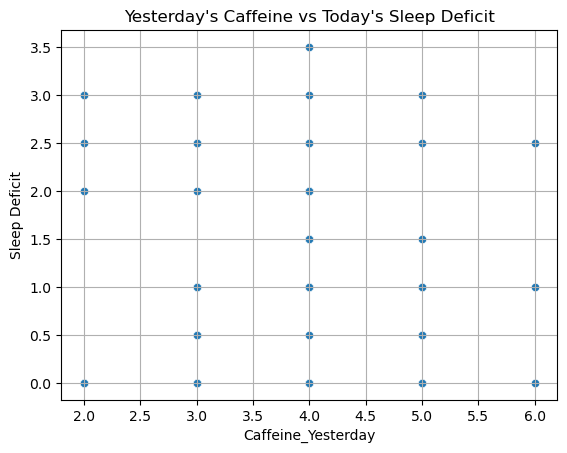

In [30]:
sns.scatterplot(data=numeric_data, x='Caffeine_Yesterday', y='Sleep Deficit')
plt.title("Yesterday's Caffeine vs Today's Sleep Deficit")
plt.grid(True)
plt.show()

## It appears that there is no linear correlation between yesterday's caffeine and today's sleep deficit
### But I will still conduct hypothesis tests for their independence. 

## H₀: Yesterday's caffeine and Today's sleep deficit are independent
## Hₐ: Yesterday's caffeine and Today's sleep deficit are dependent
<h3> As there are too many expected value calculations, this time I will calculate the observed statistic and p_value from Python </h3>

In [31]:
numeric_data.describe()

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,Sleep Deficit,Caffeine_Yesterday
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,3.761905,6.865079,4.841270,1.722222,1.293651,3.777778
std,1.011455,1.302003,1.183984,0.473302,1.053546,1.023032
min,2.000000,4.500000,1.500000,0.000000,0.000000,2.000000
25%,3.000000,6.000000,4.000000,1.500000,0.500000,3.000000
50%,4.000000,7.000000,5.000000,2.000000,1.000000,4.000000
75%,4.000000,7.500000,5.500000,2.000000,2.000000,4.000000
max,6.000000,10.000000,7.500000,2.000000,3.500000,6.000000


In [32]:
numeric_data['Caffeine_Yesterday_Binned'] = pd.cut(
    numeric_data['Caffeine_Yesterday'], 
    bins=[0, 3, 5, 7], 
    labels=['Low', 'Medium', 'High']
)

numeric_data['Sleep_Deficit_Binned'] = pd.cut(
    numeric_data['Sleep Deficit'], 
    bins=[-0.1, 1, 2.5, 5], 
    labels=['Low', 'Moderate', 'High']
)


In [33]:
numeric_data.sample(5)

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,SleepLevel,Sleep Deficit,Caffeine_Yesterday,Caffeine_Yesterday_Binned,Sleep_Deficit_Binned
59,4,5.0,2.5,2.0,Low,3.0,2.0,Low,High
23,3,5.5,4.0,1.5,Low,2.5,3.0,Low,Moderate
34,3,6.0,4.0,2.0,Low,2.0,3.0,Low,Moderate
12,3,7.0,5.0,2.0,High,1.0,5.0,Medium,Low
53,3,6.0,3.5,2.0,Low,2.0,4.0,Medium,Moderate


In [34]:
pd.crosstab(numeric_data['Caffeine_Yesterday_Binned'], numeric_data['Sleep_Deficit_Binned'])

Sleep_Deficit_Binned,Low,Moderate,High
Caffeine_Yesterday_Binned,,,
Low,14,6,4
Medium,19,14,3
High,2,1,0


## There are 3 categories for sleep deficit and caffeine yesterday. As our hypothesis will be conducted on an r x c table, the degree of freedom will be (r-1)x(c-1) = 2 x 2 = 4. 

### Contingency Table: Yesterday's Caffeine vs Today's Sleep Deficit

| Yesterday's Caffeine | Low | Moderate | High | **Total** |
|----------------------|-----|----------|------|----------|
| **Low**              | 14  | 6        | 4    | 24       |
| **Medium**           | 19  | 14       | 3    | 36       |
| **High**             | 2   | 1        | 0    | 3        |
| **Total**            | 35  | 21       | 7    | **63**   |


## Exptected value of the index (i,j) is equal to the following = (the total of j the column x the total of i th row) / (the grand total)

### Expected Counts Table (Under H₀)

| Yesterday's Caffeine | Low | Moderate | High |
|----------------------|-----|----------|------|
| **Low**              | 13.33 | 8.0     | 2.67 |
| **Medium**           | 20.0 | 12.0    | 4.0 |
| **High**             | 1.67 | 1.00    | 0.33 |


## Then the observed chi-square statistic becomes: 
$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} 
= \frac{(14 - 13.33)^2}{13.33} 
+ \frac{(6 - 8)^2}{8} 
+ \frac{(4 - 2.67)^2}{2.67} 
+ \cdots 
\approx 2.233
$$


From the chi-square table, the critical value which represents the chi-square distribution with 4 degrees of freedom at a 0.05 significance level is 9.488. 

Since the observed statistic is: 2.233 < 9.488,
we **fail to reject the null hypothesis**.

This means the data **does not provide sufficient evidence** to suggest a dependency between caffeine consumption yesterday and sleep deficit today.  
In other words, the data is **consistent with the assumption of independence** between the two variables.


In [35]:
numeric_data.head(5)

,Caffeine Intake,Hours of Sleep,Study Hours,Exercise Hours,SleepLevel,Sleep Deficit,Caffeine_Yesterday,Caffeine_Yesterday_Binned,Sleep_Deficit_Binned
1,4,6.5,5.5,1.0,Low,1.5,5.0,Medium,Moderate
2,4,6.5,4.5,2.0,Low,1.5,4.0,Medium,Moderate
3,4,6.0,5.0,1.0,Low,2.0,4.0,Medium,Moderate
4,3,7.0,5.0,2.0,High,1.0,4.0,Medium,Low
5,4,7.5,5.0,2.0,High,0.5,3.0,Low,Low


# Machine Learning Integration 
## First I will develop a regression model to predict the study hours given the other features in the numeric data set

In [36]:
cleaned_data = numeric_data.drop(columns=['Caffeine_Yesterday', 'Sleep Deficit'])

categorical_cols = ['SleepLevel', 'Caffeine_Yesterday_Binned', 'Sleep_Deficit_Binned']

encoded_data = pd.get_dummies(cleaned_data, columns=categorical_cols, drop_first=True)

print(encoded_data.head())

   Caffeine Intake  Hours of Sleep  Study Hours  Exercise Hours  \
1                4             6.5          5.5             1.0   
2                4             6.5          4.5             2.0   
3                4             6.0          5.0             1.0   
4                3             7.0          5.0             2.0   
5                4             7.5          5.0             2.0   

   SleepLevel_High  Caffeine_Yesterday_Binned_Medium  \
1            False                              True   
2            False                              True   
3            False                              True   
4             True                              True   
5             True                             False   

   Caffeine_Yesterday_Binned_High  Sleep_Deficit_Binned_Moderate  \
1                           False                           True   
2                           False                           True   
3                           False                       

## Sleep Level, Caffeine Yesterday_Binned, and Sleep Deficit_Binned were categorical variables, so before I train my model I needed to do one hot encoding on them  

In [37]:
X = encoded_data.drop(columns=['Study Hours'])
y = encoded_data['Study Hours']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.sample(5)

,Caffeine Intake,Hours of Sleep,Exercise Hours,SleepLevel_High,Caffeine_Yesterday_Binned_Medium,Caffeine_Yesterday_Binned_High,Sleep_Deficit_Binned_Moderate,Sleep_Deficit_Binned_High
9,4,7.0,1.0,True,False,True,False,False
47,4,5.5,1.5,False,True,False,True,False
2,4,6.5,2.0,False,True,False,True,False
33,3,7.5,2.0,True,True,False,False,False
21,3,6.0,2.0,False,True,False,True,False


## Now I splitted the new dataset into 80 % training, and 20 % test. The model is to predict the study hours, so it will become the y component
### The next task is to create a regression model to predict the study hours

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


model = LinearRegression()
model.fit(X_train.select_dtypes(include='number'), y_train)  


y_pred = model.predict(X_test.select_dtypes(include='number'))
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Root Mean Squared Error: 0.39879042818217225
Mean Absolute Error: 0.31201766308117335
R-squared: 0.9292718075051507


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## The R squared value is almost 93 % which is an indicator of our model capturing the variance in the data.
### Next, I will visualize the predicted values and have further opinion on the model performance

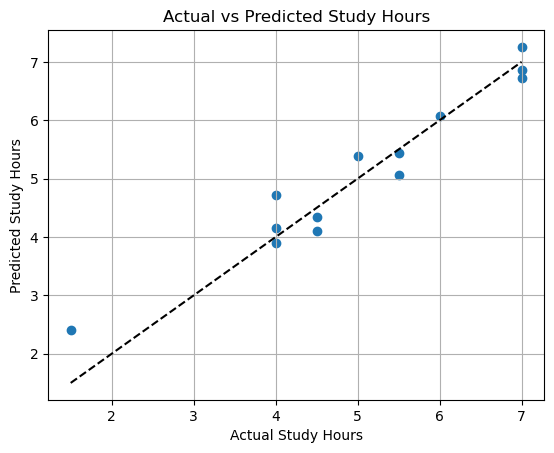

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Study Hours")
plt.ylabel("Predicted Study Hours")
plt.title("Actual vs Predicted Study Hours")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.grid(True)
plt.show()

## Here are the coefficients and intercepts of our best fit line

In [41]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.05600844  0.90223344 -1.28939148]
Intercept: 1.0929821518873948


## I also want to see to which feature these coefficients are allocated to 
### This will determine their importance in predicting the study hours

In [42]:
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

Caffeine Intake: -0.05600843795740386
Hours of Sleep: 0.9022334422030784
Exercise Hours: -1.2893914761256815


## As it can be seen from the mapped coefficients, the study hours attribute is directly proportional to the hours of sleep and inversely proportional to the exercise hours. This may be because the days I allocate more time to study, I allocate less time to exercise. There is a weak correlation with the caffeine intake

## Even though Linear Regression yielded good R^2 correlation values and low MSE, I would like to test other types of regressions to see whether I can get a better model. 
### Now I will use Decision Tree Regressor to see whether the model it creates can capture variances better than the Linear Regression model

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2 = r2_score(y_test, y_pred_tree)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
print("Decision Tree MAE:", mae_tree)
print("Decision Tree RMSE:", rmse_tree)
print(f"R² Score: {r2:.2f}")

Decision Tree MAE: 0.28205128205128205
Decision Tree RMSE: 0.5508346425369445
R² Score: 0.87


## For better performance measures, I will use cross validation
## This will enable us to have a perspective on the entire dataset, and as we take the average of multiple performances with different test sets, that would be more accurate

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)
print("Decision Tree Cross-Validated RMSE: %.2f ± %.2f" % (rmse_scores.mean(), rmse_scores.std()))

Decision Tree Cross-Validated RMSE: 0.63 ± 0.08


## Now, using the semantics of decision trees, I will plot each feature's importance in predicting the study hours

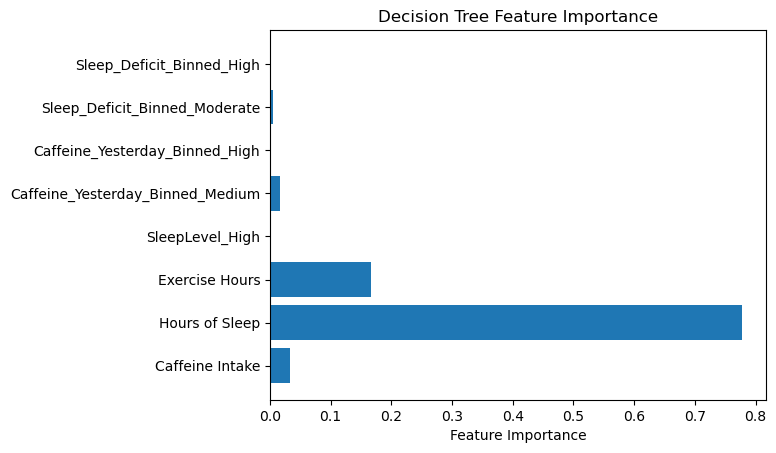

In [47]:
importances = tree_model.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

## The decision tree regression model also shows that hours of sleep has the greatest impact on the study hours compared to the other features. 

## The results show that Linear Regression model captures the variance better compared to the Decision Tree Regressor as it has higher R^2 score and lower mean squared errors

## One final regression model I will add is polynomial regression. I want to see whether polynomial regression captures the variances in study hours better than other models or not

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Results: 

In [49]:
print(f"Polynomial Regression (degree=2) MAE: {mae_poly:.2f}")
print(f"Polynomial Regression (degree=2) RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression (degree=2) R² Score: {r2_poly:.2f}")

Polynomial Regression (degree=2) MAE: 0.63
Polynomial Regression (degree=2) RMSE: 0.82
Polynomial Regression (degree=2) R² Score: 0.70


## I want to see the actual distribution as well, so I will plot the results

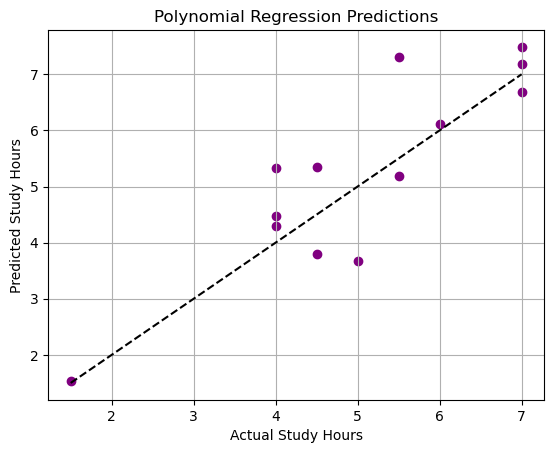

In [50]:
plt.scatter(y_test, y_pred_poly, color='purple')
plt.xlabel("Actual Study Hours")
plt.ylabel("Predicted Study Hours")
plt.title("Polynomial Regression Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.grid(True)
plt.show()

## The results indicate that in our scenario, the rankings of the performances to predict study hours is the following: 

### Linear Regression > Decision Tree Regressor > Polynomial Regression